# Hotel Booking Demand


1. [Problem Statement](#Problem-Statement)
1. [Data Understanding](#Data-Understanding)
1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
1. [Preprocessing](#Preprocessing)
1. [Modeling](#Modeling)
1. [Conclusion & Recommendation](#Conclusion-&-Recommendation)

## Problem Statement

### Problem Background & Stakeholders
The hotel industry faces significant challenges related to booking cancellations, which can impact revenue, operational efficiency, and overall customer satisfaction. Key stakeholders include:

- **Hotel Management:** Seeks to minimize revenue loss due to last-minute cancellations.
- **Revenue Management Teams:** Need accurate cancellation predictions to implement dynamic pricing and optimize room allocation.
- **Marketing Departments:** Can target customers more effectively by understanding cancellation patterns.
- **Business Strategy Teams:** Focus on evaluating campaign effectiveness, measuring ROI, and developing actionable strategies for growth.

## Analytical Approach

### Evaluating Model Performance: Understanding False Positives and False Negatives

When predicting hotel booking cancellations, it is crucial to understand the implications of false positives and false negatives, as they directly impact revenue management and operational planning.

#### False Positives (FP)
- **Definition:**  
  The model predicts that a booking will be canceled, but in reality, it is not canceled.
- **Business Impact:**  
  - **Overbooking Risk:** If a booking is incorrectly flagged as canceled, the hotel might open up that room for another guest. If the original booking proceeds, this can lead to overbooking issues, causing guest dissatisfaction and potential operational complications.
  - **Resource Misallocation:** Efforts and resources may be diverted to manage an anticipated cancellation that never occurs, resulting in inefficiencies in resource planning.

#### False Negatives (FN)
- **Definition:**  
  The model predicts that a booking will not be canceled, but in reality, it is canceled.
- **Business Impact:**  
  - **Lost Revenue:** When a cancellation is not predicted, the hotel may prepare for the guest's arrival (e.g., staffing, inventory, and service preparations) and incur associated costs, only to have the room remain vacant.
  - **Missed Rebooking Opportunities:** A false negative can prevent the hotel from proactively rebooking the room, leading to significant revenue loss.
  
### Deciding Which is More Critical: FP or FN?
- **False Negatives are more critical.**  
  In the context of hotel booking cancellation prediction, failing to identify a cancellation (FN) can lead to unoccupied rooms and lost revenue opportunities. While false positives can lead to operational challenges such as overbooking, the financial impact of unfilled rooms due to unexpected cancellations is typically more severe.

### Choosing Evaluation Metrics for Booking Cancellation Prediction
- **Recall:**  
  Recall is the most critical metric in this scenario. A high recall ensures that the model captures as many actual cancellations as possible, minimizing the risk of unanticipated vacant rooms.
  
- **F1 Score:**  
  Balancing recall with precision using the F1 Score is essential. This metric helps in managing the trade-off between catching as many cancellations as possible (recall) while avoiding too many false alarms (precision) that can lead to unnecessary overbooking strategies.

### Conclusion
- **Prioritize recall** to ensure that as many at-risk bookings as possible are flagged, reducing the chance of unanticipated cancellations.
- **Balance recall and precision** using the F1 Score to avoid excessive operational adjustments and overbooking risks.
- **Utilize ROC AUC** as a supplementary metric to gauge overall model performance during model selection.

By focusing on these metrics, we can ensure that our cancellation prediction model not only identifies potential cancellations accurately but also supports informed operational and revenue management decisions.

---

## Data Understanding

In this section, we will explore the dataset in detail to understand its structure, features, and any potential issues that may affect our classification model for predicting booking cancellations.

### Dataset Overview
- **Source:** [Hotel Booking Demand Dataset on Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data)
- **Description:**  
  This dataset contains 119,389 historical booking records from hotels, which include various features such as booking details, customer demographics, and booking statuses. Each row in the dataset represents a single booking record.

- **Target Variable:**  
  For our classification task, the target variable is **`is_canceled`**, where:
  - `1` indicates that the booking was canceled.
  - `0` indicates that the booking was not canceled.

### Feature Overview

Below is a table summarizing the key features in the dataset:

| **Feature**                         | **Description**                                                                                                                                       |
|-------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|
| **hotel**                           | Type of hotel (e.g., "Resort Hotel" or "City Hotel")                                                                                                  |
| **is_canceled**                     | Booking cancellation status (1 = canceled, 0 = not canceled)                                                                                          |
| **lead_time**                       | Number of days between the booking date and the arrival date                                                                                          |
| **arrival_date_year**               | Year of arrival                                                                                                                                       |
| **arrival_date_month**              | Month of arrival                                                                                                                                      |
| **arrival_date_day_of_month**       | Day of the month when the arrival is scheduled                                                                                                        |
| **stays_in_weekend_nights**         | Number of weekend nights the booking covers                                                                                                           |
| **stays_in_week_nights**            | Number of weeknights the booking covers                                                                                                                 |
| **adults**                          | Number of adults included in the booking                                                                                                               |
| **children**                        | Number of children included in the booking                                                                                                             |
| **babies**                          | Number of babies included in the booking                                                                                                               |
| **meal**                            | Type of meal package booked                                                                                                                            |
| **country**                         | Country of origin of the customer                                                                                                                      |
| **market_segment**                  | Market segment designation (e.g., "Direct", "Corporate", etc.)                                                                                         |
| **distribution_channel**            | Booking distribution channel                                                                                                                           |
| **is_repeated_guest**               | Indicates if the guest has stayed before                                                                                                               |
| **previous_cancellations**          | Number of previous bookings that were canceled                                                                                                         |
| **previous_bookings_not_canceled**  | Number of previous bookings that were not canceled                                                                                                     |
| **reserved_room_type**              | Room type that was initially reserved                                                                                                                  |
| **assigned_room_type**              | Room type that was ultimately assigned                                                                                                                 |
| **booking_changes**                 | Number of changes made to the booking                                                                                                                  |
| **deposit_type**                    | Type of deposit required for the booking                                                                                                               |
| **agent**                           | Travel agent ID (if applicable)                                                                                                                          |
| **company**                         | Company ID associated with the booking (if applicable)                                                                                                 |
| **days_in_waiting_list**            | Number of days the booking was on the waiting list                                                                                                     |
| **customer_type**                   | Type of customer (e.g., transient, contract, etc.)                                                                                                     |
| **required_car_parking_spaces**     | Number of car parking spaces requested                                                                                                                 |
| **total_of_special_requests**       | Number of special requests made by the customer                                                                                                        |
| **reservation_status**              | Current reservation status (e.g., check-in, no-show, canceled)                                                                                         |
| **reservation_status_date**         | Date when the current reservation status was recorded                                                                                                  |


---

### Importing Libraries and Loading Data

In [45]:
# !pip install category_encoders

In [46]:
#Import Libraries

#import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.model_selection import cross_validate

# encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import category_encoders as ce

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


import shap

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [47]:
#  Google Drive file ID for the Hotel Booking Demand dataset
#file_id = "1tpmHknHJK-dS7oYhQZiytrqrSDj0ne9D"
#file_url = f"https://drive.google.com/uc?id={file_id}"
#output_file = "Hotel_Booking_Demand.csv"

# Download the file using gdown
#gdown.download(file_url, output_file, quiet=False)

#print("\nDownload complete! File saved as:", output_file)

df = pd.read_csv('hotel_bookings.csv')

df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [48]:
# Extract File into Dataframe
#df = pd.read_csv(r'/content/Hotel_Booking_Demand.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [49]:
df.shape

(119390, 32)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [51]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [52]:
df.describe(include='object').transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [53]:
pd.DataFrame({
    'column': df.columns.values,
    'datatype': df.dtypes.values,
    'nullvalue(%)': df.isna().mean().values * 100,
    'negativevalue(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'uniquevalue': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,column,datatype,nullvalue(%),negativevalue(%),0value(%),duplicate,uniquevalue,sample_unique
0,hotel,object,0.000,0.000,0.000,31994,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0.000,0.000,62.958,31994,2,"[0, 1]"
2,lead_time,int64,0.000,0.000,5.315,31994,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68..."
3,arrival_date_year,int64,0.000,0.000,0.000,31994,3,"[2015, 2016, 2017]"
4,arrival_date_month,object,0.000,0.000,0.000,31994,12,"[July, August, September, October, November, D..."
5,arrival_date_week_number,int64,0.000,0.000,0.000,31994,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
6,arrival_date_day_of_month,int64,0.000,0.000,0.000,31994,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,stays_in_weekend_nights,int64,0.000,0.000,43.553,31994,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,..."
8,stays_in_week_nights,int64,0.000,0.000,6.403,31994,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,..."
9,adults,int64,0.000,0.000,0.338,31994,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


The dataset contains information related to hotel bookings, including details about the booking, customer, and stay. It consists of 31 columns and 31,994 rows. Each row represents a unique booking, and the columns capture various attributes such as booking details, customer information, and stay characteristics.

1.  62.96% of bookings are not canceled, but a significant portion (37.04%) are canceled.

2.  Most bookings are for adults, with very few including children or babies.

3. Most bookings are made through online travel agents or directly.

4. The adr column can be used to analyze revenue trends and pricing strategies.

5. Some columns like company and agent have high null values, which may require imputation or removal.

## Data Cleaning

### Duplicated Data

In [54]:
display(f'Total of Duplicated Rows: {df.duplicated().sum()}')
display(df[df.duplicated])

'Total of Duplicated Rows: 31994'

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [55]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())
print(df.shape)

0
(87396, 32)


### Missing Values

In [56]:
missing_data = df.isna().sum()
missing_data = missing_data[missing_data > 0]
missing_percentage = round(missing_data / df.shape[0] * 100, 3)

# Create Dataframe
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_percentage
})

In [57]:
pd.set_option('display.max_columns',None)
for col in missing_df.index:
    print(f"Rows with missing values in '{col}': (showing first 10 rows)")
    display(df[df[col].isna()].head(10))
    print("-" * 50)
pd.reset_option('display.max_columns')

Rows with missing values in 'children': (showing first 10 rows)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


--------------------------------------------------
Rows with missing values in 'country': (showing first 10 rows)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
9376,Resort Hotel,1,0,2016,November,48,21,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,386.0,0,Group,0.0,0,0,Canceled,2016-11-21
9610,Resort Hotel,1,4,2016,December,52,20,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,D,0,No Deposit,NaN,204.0,0,Transient,30.0,0,2,Canceled,2016-12-19
11262,Resort Hotel,1,87,2017,April,18,30,2,3,2,0.0,0,BB,NaN,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,48.0,0,0,Canceled,2017-02-02
13803,Resort Hotel,0,7,2016,January,3,13,0,2,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,1,A,D,0,No Deposit,94.0,NaN,0,Transient,27.0,0,0,Check-Out,2016-01-15
13804,Resort Hotel,0,7,2016,January,4,18,1,3,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,2,A,A,0,No Deposit,NaN,94.0,0,Transient,28.5,1,0,Check-Out,2016-01-22


--------------------------------------------------
Rows with missing values in 'agent': (showing first 10 rows)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.00,0,2,Check-Out,2015-07-15
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.30,0,2,Canceled,2015-05-29
42,Resort Hotel,0,16,2015,July,27,2,2,3,2,0.0,0,BB,ESP,Direct,Direct,0,0,0,F,F,0,No Deposit,NaN,NaN,0,Transient,123.00,0,0,Check-Out,2015-07-07
55,Resort Hotel,0,1,2015,July,27,2,0,1,2,2.0,0,BB,ESP,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,1,2,Check-Out,2015-07-03
56,Resort Hotel,0,0,2015,July,27,2,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,H,H,0,No Deposit,NaN,NaN,0,Transient,147.00,0,0,Check-Out,2015-07-03


--------------------------------------------------
Rows with missing values in 'company': (showing first 10 rows)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23


--------------------------------------------------


> We drop the 4 missing rows in the `children` column (0.005% of data) as they all belong to canceled bookings (`is_canceled = 1`), which could mislead the analysis.

In [58]:
df.dropna(subset=['children'],inplace=True)

In [59]:
df[df['country'].isna()]['is_canceled'].value_counts()

is_canceled
0    418
1     34
Name: count, dtype: int64

> We replace missing values in the `country` column (0.517% of data) with `"Unknown"` since most are from non-canceled bookings (`is_canceled = 0`), ensuring data completeness while avoiding misinterpretation.

In [60]:
df['country'].fillna('Unknown', inplace=True)

> We replace missing values in the `agent` and `company` columns with `"Not Applicable"` since, according to the **Hotel Booking Demand Dataset** article, these values are not truly missing but indicate that the booking was made without an agent or company.


In [61]:
df[['agent', 'company']] = df[['agent', 'company']].apply(lambda x: x.fillna(0).astype(int))
df[['agent', 'company']] = df[['agent', 'company']].replace(0, 'Not Applicable')

---

### Checking Inconsistent Data Entries (Cardinality)
To assess the cardinality of categorical variables, we check the unique values in each column. This helps identify high-cardinality features, detect inconsistencies, and ensure data consistency.

In [62]:
unique_values_summary = {
    'Column': [],
    'Total Unique Values': [],
    'Unique Values': []
}
pd.set_option('display.max_colwidth', None)

for column in df.select_dtypes(include=['object']).columns:
    unique_vals = df[column].unique()
    unique_values_summary['Column'].append(column)
    unique_values_summary['Unique Values'].append(unique_vals)
    unique_values_summary['Total Unique Values'].append(len(unique_vals))

display(pd.DataFrame(unique_values_summary))

pd.reset_option('display.max_colwidth')

,Column,Total Unique Values,Unique Values
0,hotel,2,"[Resort Hotel, City Hotel]"
1,arrival_date_month,12,"[July, August, September, October, November, December, January, February, March, April, May, June]"
2,meal,5,"[BB, FB, HB, SC, Undefined]"
3,country,178,"[PRT, GBR, USA, ESP, IRL, FRA, Unknown, ROU, NOR, OMN, ARG, POL, DEU, BEL, CHE, CN, GRC, ITA, NLD, DNK, RUS, SWE, AUS, EST, CZE, BRA, FIN, MOZ, BWA, LUX, SVN, ALB, IND, CHN, MEX, MAR, UKR, SMR, LVA, PRI, SRB, CHL, AUT, BLR, LTU, TUR, ZAF, AGO, ISR, CYM, ZMB, CPV, ZWE, DZA, KOR, CRI, HUN, ARE, TUN, JAM, HRV, HKG, IRN, GEO, AND, GIB, URY, JEY, CAF, CYP, COL, GGY, KWT, NGA, MDV, VEN, SVK, FJI, KAZ, PAK, IDN, LBN, PHL, SEN, SYC, AZE, BHR, NZL, THA, DOM, MKD, MYS, ARM, JPN, LKA, CUB, CMR, BIH, MUS, COM, ...]"
4,market_segment,7,"[Direct, Corporate, Online TA, Offline TA/TO, Complementary, Groups, Aviation]"
5,distribution_channel,5,"[Direct, Corporate, TA/TO, Undefined, GDS]"
6,reserved_room_type,10,"[C, A, D, E, G, F, H, L, P, B]"
7,assigned_room_type,12,"[C, A, D, E, G, F, I, B, H, P, L, K]"
8,deposit_type,3,"[No Deposit, Refundable, Non Refund]"
9,agent,334,"[Not Applicable, 304, 240, 303, 15, 241, 8, 250, 115, 5, 175, 134, 156, 243, 242, 3, 105, 40, 147, 306, 184, 96, 2, 127, 95, 146, 9, 177, 6, 143, 244, 149, 167, 300, 171, 305, 67, 196, 152, 142, 261, 104, 36, 26, 29, 258, 110, 71, 181, 88, 251, 275, 69, 248, 208, 256, 314, 126, 281, 273, 253, 185, 330, 334, 328, 326, 321, 324, 313, 38, 155, 68, 335, 308, 332, 94, 348, 310, 339, 375, 66, 327, 387, 298, 91, 245, 385, 257, 393, 168, 405, 249, 315, 75, 128, 307, 11, 436, 1, 201, ...]"


> After checking the unique values of each categorical column, we found that `'Undefined'` in the `meal` column has the same meaning as `'SC'` based on the data description. Therefore, we replace `'Undefined'` with `'SC'` to maintain consistency.


In [63]:
df['meal'] = df['meal'].replace({'Undefined' : 'SC'})

### Handling Data Types

In [64]:
dtype_table = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values,
    'Sample Values': [df[col].dropna().unique()[:5] for col in df.columns]
})

display(dtype_table.sort_values('Data Type'))

,Column Name,Data Type,Sample Values
21,booking_changes,int64,"[3, 4, 0, 1, 2]"
1,is_canceled,int64,"[0, 1]"
2,lead_time,int64,"[342, 737, 7, 13, 14]"
3,arrival_date_year,int64,"[2015, 2016, 2017]"
29,total_of_special_requests,int64,"[0, 1, 3, 2, 4]"
5,arrival_date_week_number,int64,"[27, 28, 29, 30, 31]"
6,arrival_date_day_of_month,int64,"[1, 2, 3, 4, 5]"
7,stays_in_weekend_nights,int64,"[0, 1, 2, 4, 3]"
8,stays_in_week_nights,int64,"[0, 1, 2, 3, 4]"
9,adults,int64,"[2, 1, 3, 4, 40]"


In [65]:
df[df['adr'].mod(1) != 0]['adr']

9         105.50
13        154.77
14         94.71
16         97.50
17         88.20
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 42440, dtype: float64

> Since the `adr` column contains decimal values, we keep it in `float` format. However, the `children` column only has `integer` values, so we convert it to an `integer` type for consistency. Other columns already have the correct data types.

In [66]:
df['children'] = df['children'].astype(int)

In [67]:
# Sorting month values
sorted_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=sorted_month, ordered=True)

In [68]:
# Convert reservation_status_date to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

### Handling Outliers

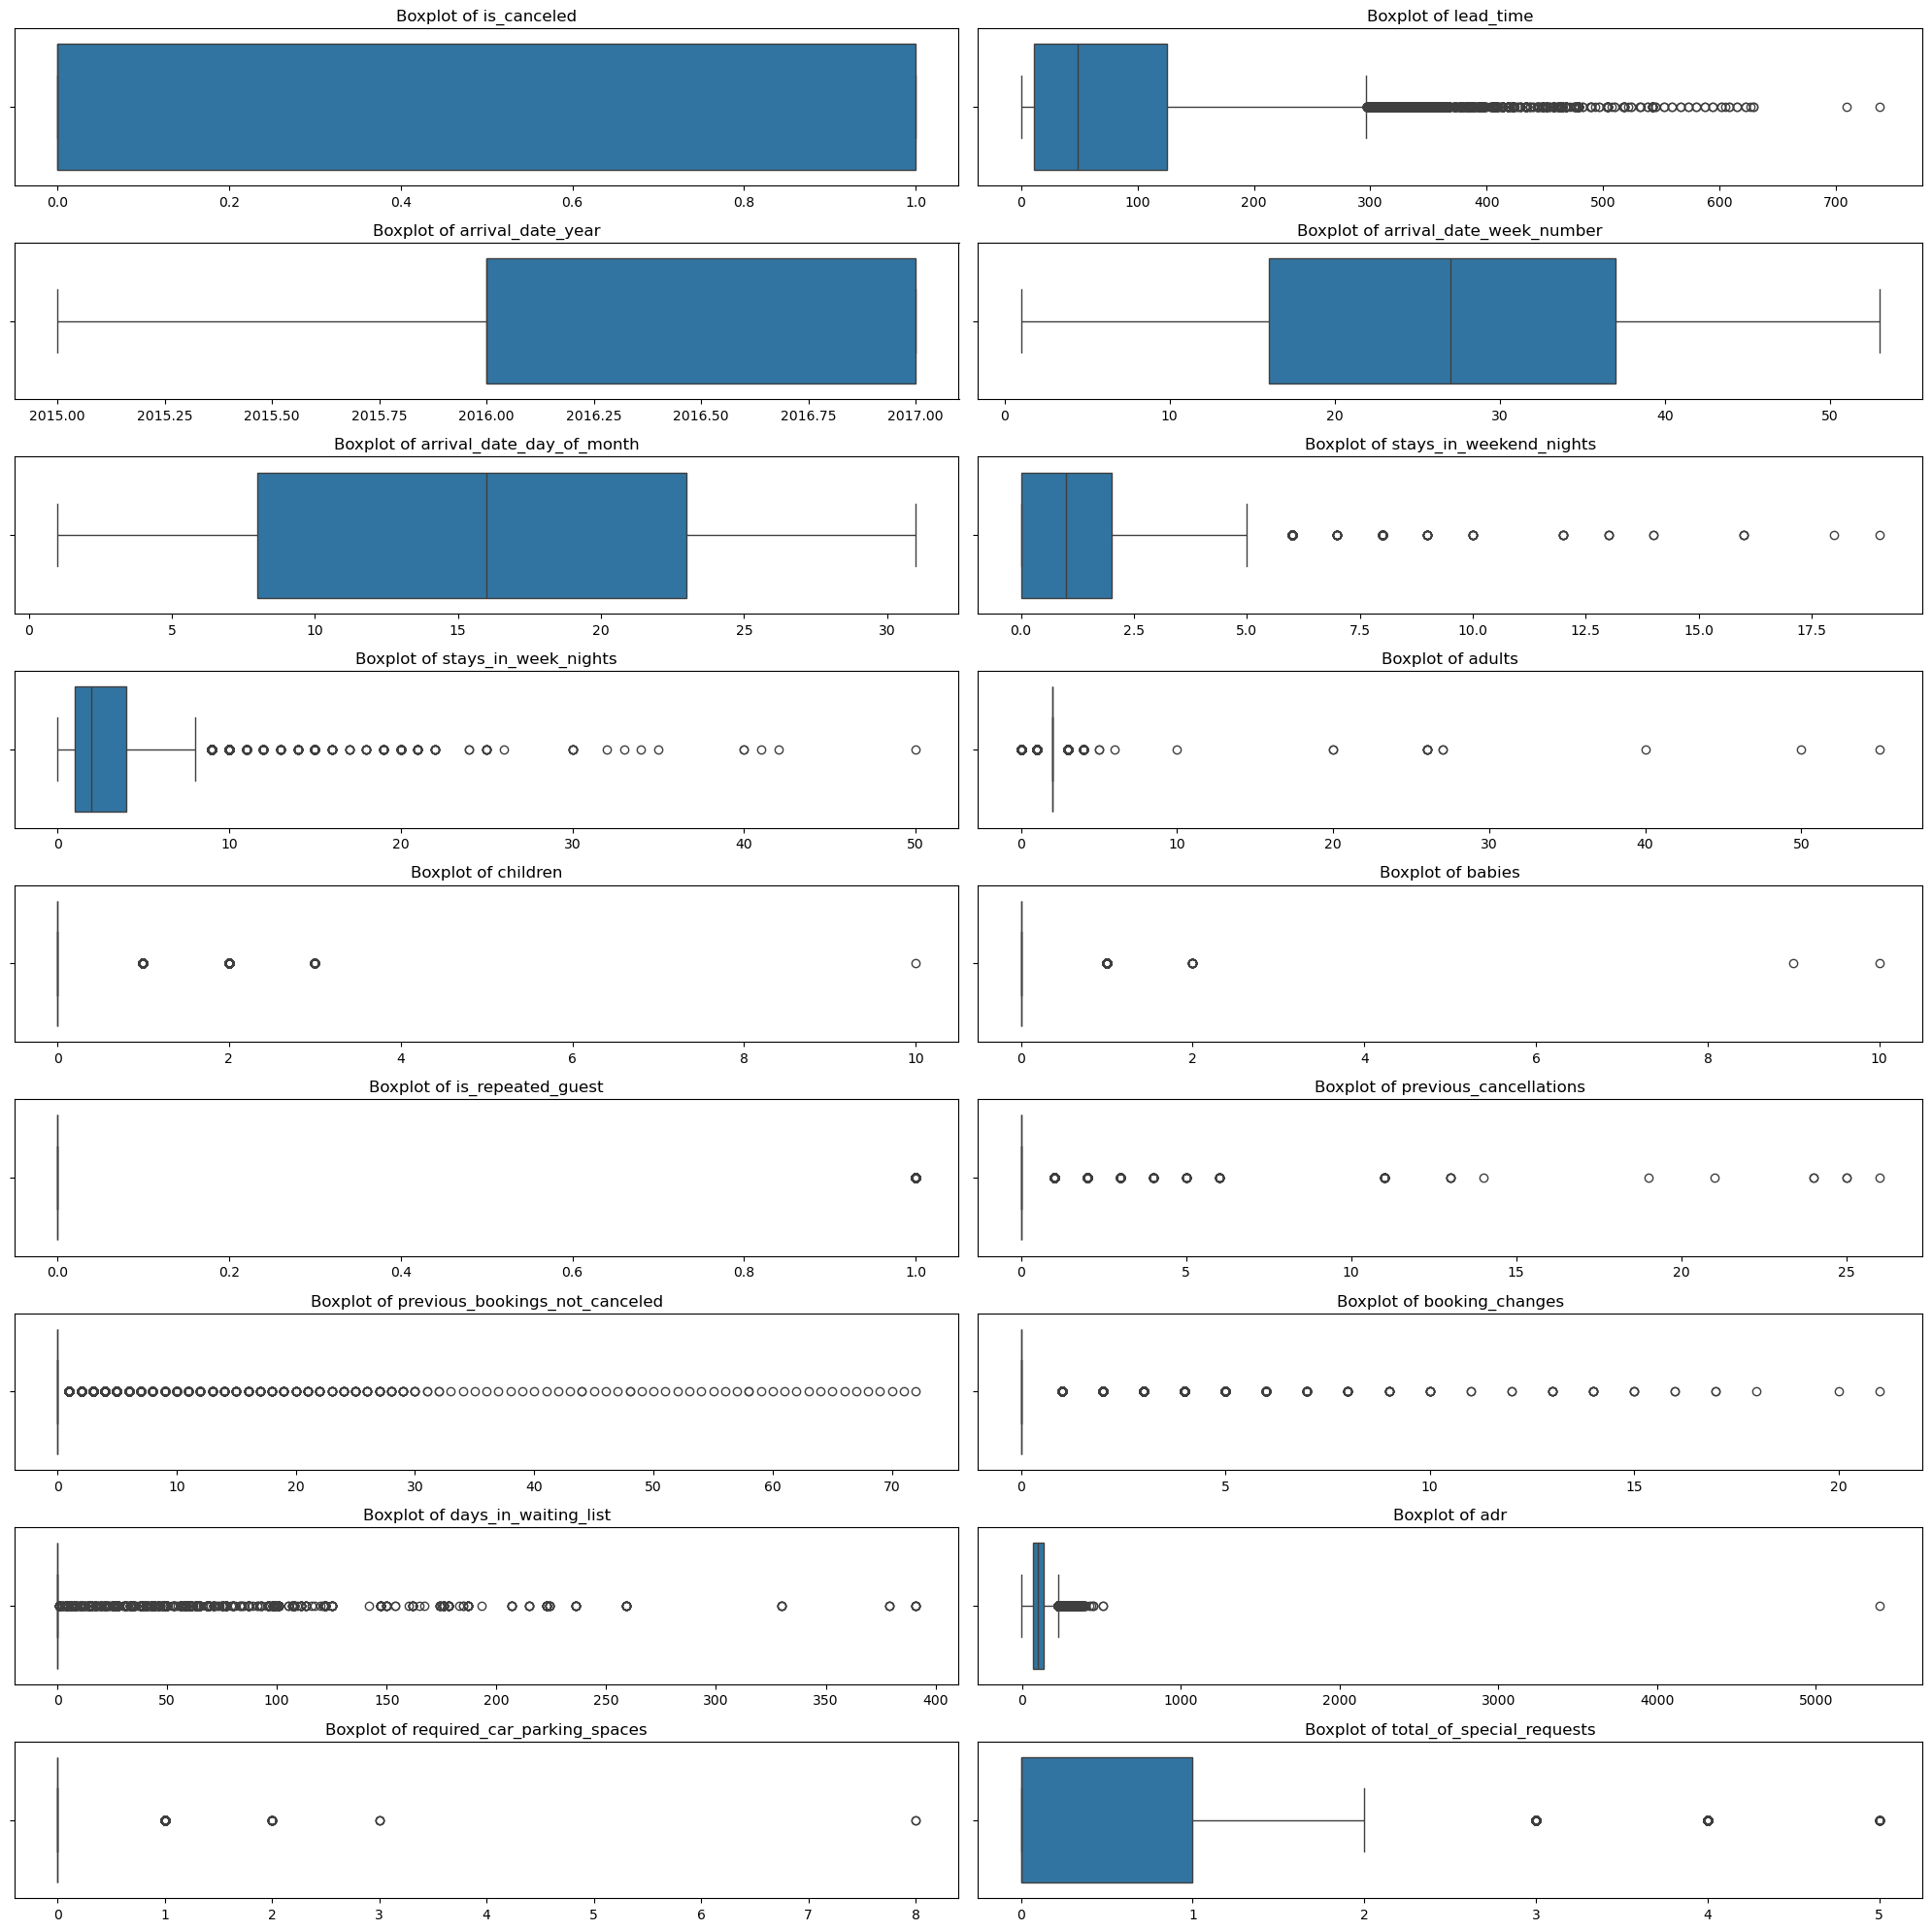

In [69]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 20))
for i, column in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 1) // 2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

> Based on the boxplot above, we can see that the `adr` column has a single extreme outlier with a value greater than 1000. Since this is an isolated case, we choose to remove it to maintain data consistency and avoid skewing the analysis.

In [70]:
df= df[df['adr']<1000]

### Handling Anomalies

> After observing the data, we found anomalies where bookings have `adults`, `children`, and `babies` all equal to `0`. These entries indicate invalid reservations since a hotel booking should include at least one person. Therefore, we choose to remove these anomalies to ensure data integrity.

In [71]:
df[(df['adults']==0)&(df['children']==0)&(df['babies']==0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,Not Applicable,174,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,Not Applicable,174,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38,Not Applicable,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308,Not Applicable,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308,Not Applicable,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7,Not Applicable,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,Not Applicable,Not Applicable,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425,Not Applicable,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9,Not Applicable,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [72]:
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

### Correlation and VIF Data

<Axes: >

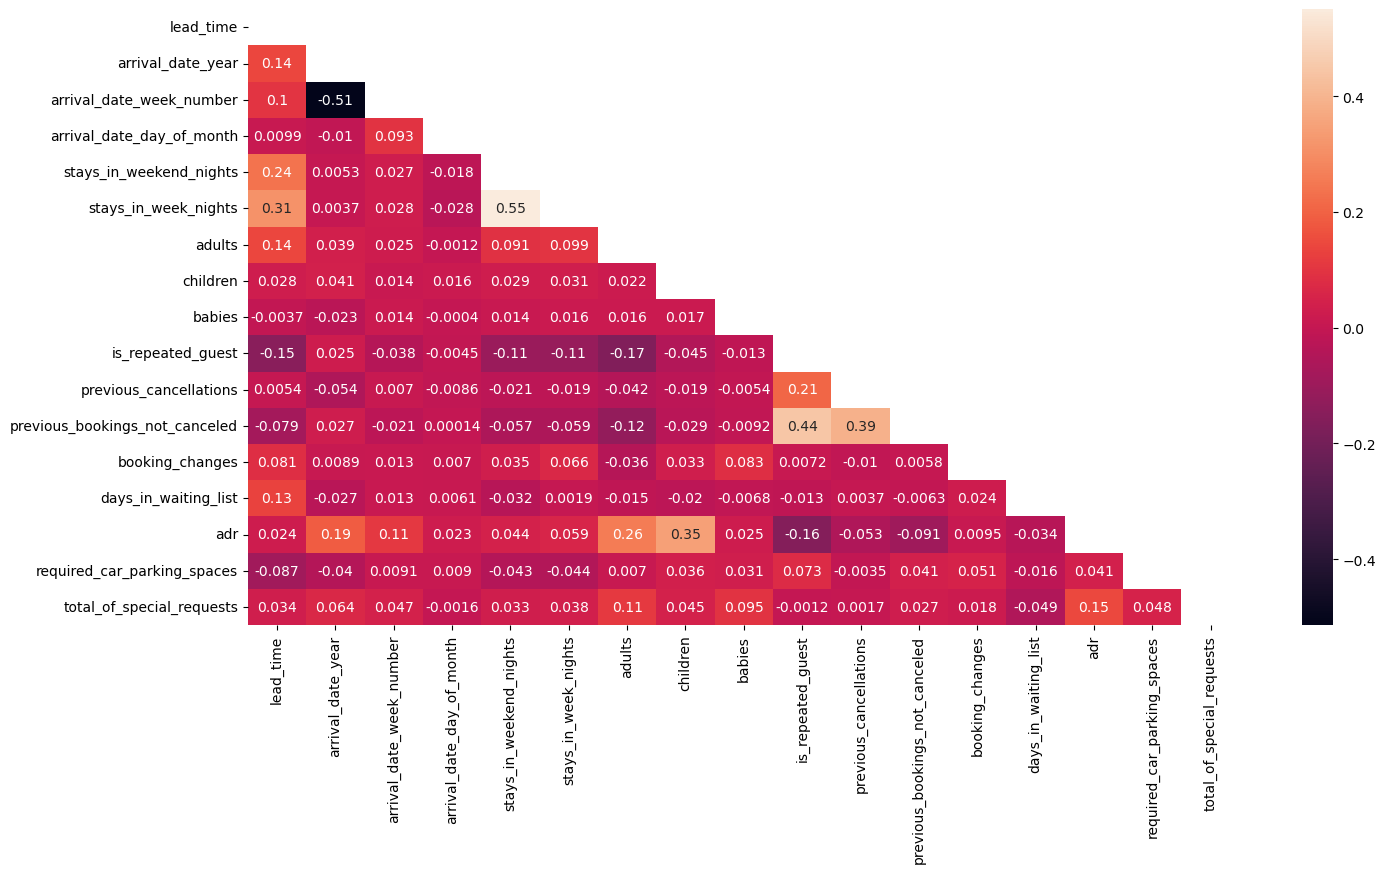

In [73]:
plt.figure(figsize=(16, 8))
num_corr = df.select_dtypes('number').drop(columns=['is_canceled']).corr()
matrix = np.triu(num_corr)
sns.heatmap(num_corr, annot=True, mask=matrix)

In [74]:
# Checking VIF for numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['is_canceled']).columns

vif_data = pd.DataFrame()
vif_data['Feature'] = num_features
vif_data['VIF'] = [variance_inflation_factor(df[num_features].values, i) for i in range(len(num_features))]

display(vif_data.sort_values(by='VIF', ascending=False))

,Feature,VIF
1,arrival_date_year,19.904269
6,adults,11.438597
14,adr,6.634134
2,arrival_date_week_number,5.010395
3,arrival_date_day_of_month,4.248902
5,stays_in_week_nights,4.035736
4,stays_in_weekend_nights,2.841791
0,lead_time,2.222012
16,total_of_special_requests,1.784077
11,previous_bookings_not_canceled,1.435039


> Based on the first calculated VIF values, we observe that the `arrival_date_year` feature has a `VIF` of approximately  `20`, which is significantly higher than the threshold of `10`. This indicates a strong multicollinearity issue, meaning it is highly correlated with other features.

To improve model performance and reduce redundancy, we will drop the arrival_date_year column.

In [75]:
df.drop(columns=['arrival_date_year'], inplace=True)

In [76]:
num_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['is_canceled']).columns

vif_data = pd.DataFrame()
vif_data['Feature'] = num_features
vif_data['VIF'] = [variance_inflation_factor(df[num_features].values, i) for i in range(len(num_features))]

display(vif_data.sort_values(by='VIF', ascending=False))

,Feature,VIF
5,adults,7.733609
13,adr,6.179710
1,arrival_date_week_number,4.402942
4,stays_in_week_nights,3.938694
2,arrival_date_day_of_month,3.675458
3,stays_in_weekend_nights,2.834698
0,lead_time,2.220137
15,total_of_special_requests,1.779499
10,previous_bookings_not_canceled,1.432573
8,is_repeated_guest,1.314845


In [ ]:
Tunjukan lagi chart yang tabel korelasinya apakah masih ada korelasi yang tinggi. supaya lebih keliatan

> After recalculating the `VIF`, we observe that all remaining features have `VIF scores below 10`, indicating that multicollinearity is no longer a concern.

## Exploratory Data Analysis

### How Many Bookings Get Canceled?



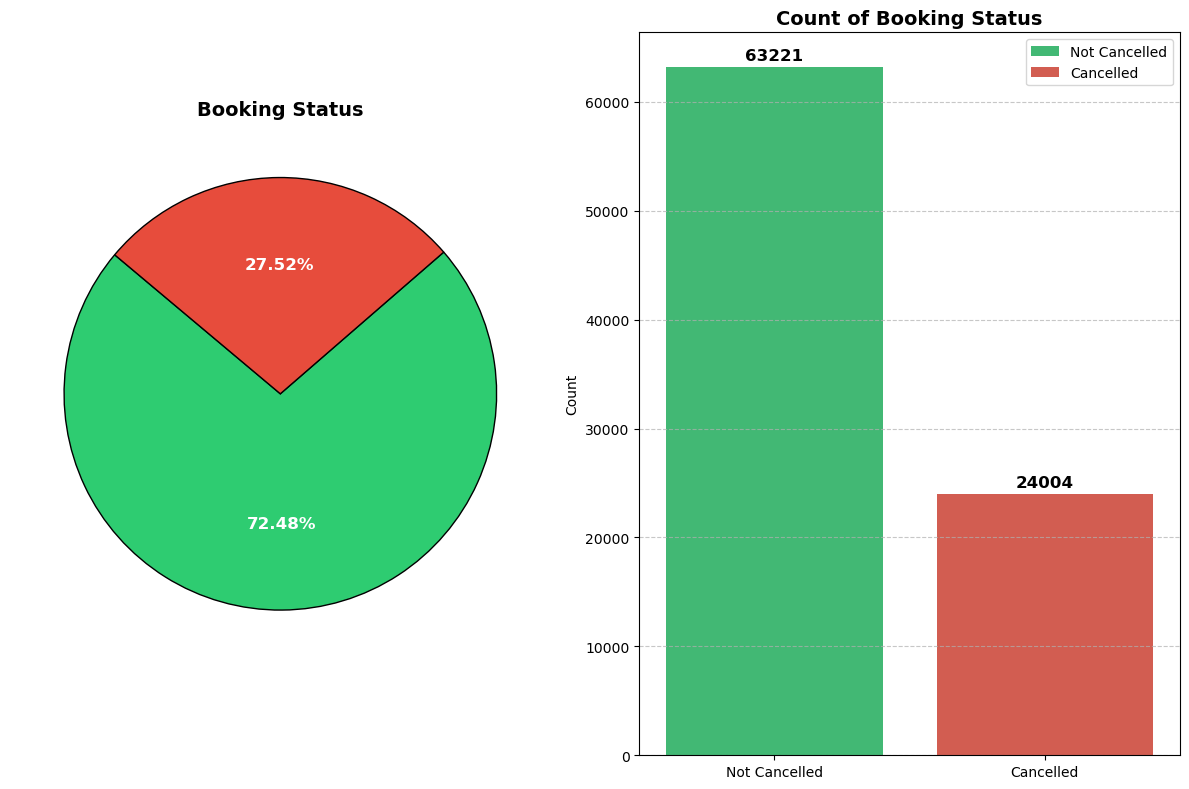

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.15, wspace=0.3)

# Pie Chart
plt.subplot(1, 2, 1)
colors = ['#2ecc71', '#e74c3c']
plt.pie(
    df['is_canceled'].value_counts(),
    autopct='%.2f%%',
    labels=['Not Cancelled', 'Cancelled'],
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12, 'fontweight': 'semibold','color':'white'}
)
plt.title('Booking Status', fontsize=14, fontweight='bold')

# Bar Chart
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x='is_canceled', hue='is_canceled', palette=colors)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=12, fontweight='semibold')

plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.xlabel('')
plt.ylabel('Count')
plt.title('Count of Booking Status', fontsize=14, fontweight='bold')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Approximately 27.5% of the guests cancelled their bookings, which indicates that our data is mildly imbalanced. If needed, we can apply a resampling method to balance the data and evaluate whether it improves our model performance.

### When are People Most Likely to Book a Hotel?

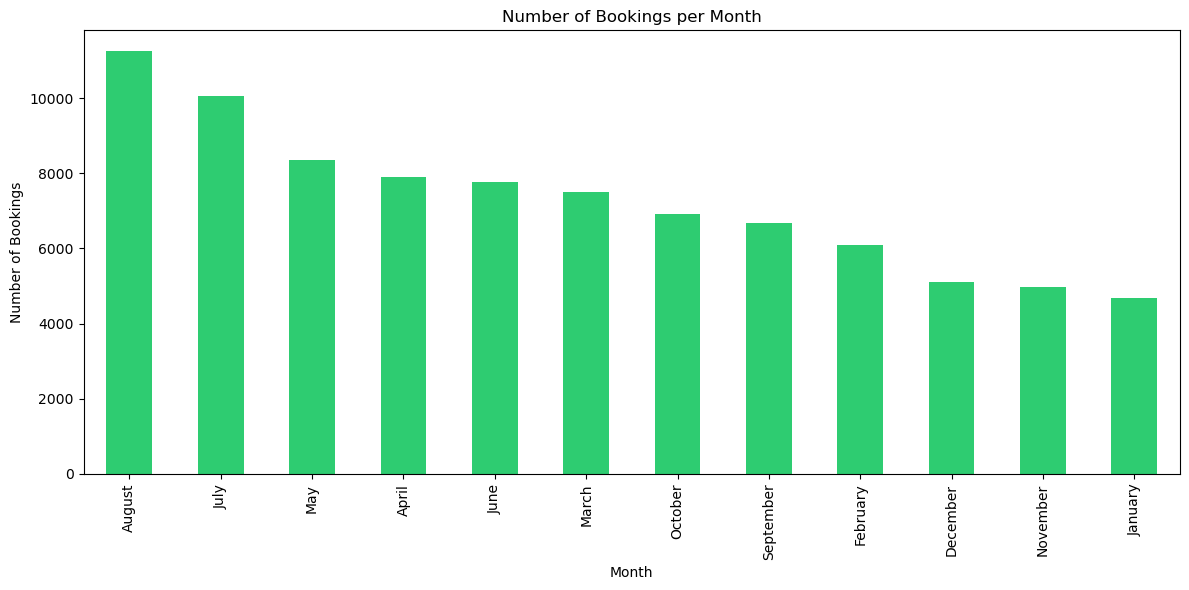

In [78]:
df['arrival_date_month'].value_counts().plot(kind='bar', figsize=(12,6),color='#2ecc71')
plt.title("Number of Bookings per Month")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.tight_layout()
plt.show()

Based on the graph above, **August and July** have the highest number of bookings, indicating a peak season, possibly due to summer vacations. On the other hand, **January, November, and December** have the lowest number of bookings, suggesting an off-season period.

This pattern is crucial for **hotel management**, as they can optimize **pricing strategies, staffing, and promotional efforts** to maximize revenue during peak months and improve occupancy during low-demand periods.

### How do cancellation rates vary between hotels?


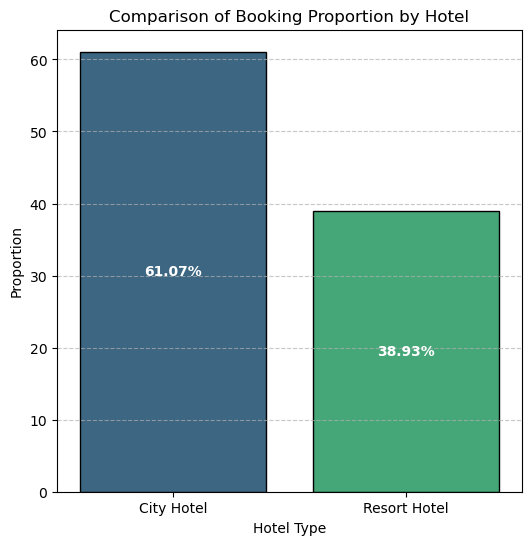

In [79]:
hotel_counts = df['hotel'].value_counts(normalize=True).sort_values(ascending=False).reset_index()
hotel_counts['proportion'] = hotel_counts['proportion'].apply(lambda x: round(x*100, 2))

plt.figure(figsize=(6,6))
ax = sns.barplot(data=hotel_counts, x='hotel', y='proportion', hue='hotel', palette='viridis', edgecolor='black')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%', label_type='center', color='white', weight='semibold')

plt.title(f'Comparison of Booking Proportion by Hotel')
plt.xlabel('Hotel Type')
plt.ylabel('Proportion')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The City Hotel accounts for approximately **61%** of total bookings, while the Resort Hotel accounts for **39%**. While this suggests that City Hotel has significantly higher demand compared to Resort Hotel, we may need to consider the difference in capacity of the two hotels. We will analyze cancellation rates relative to the total bookings for each hotel to better understand if one hotel is more prone to cancellation than the other.


<Figure size 1500x1000 with 0 Axes>

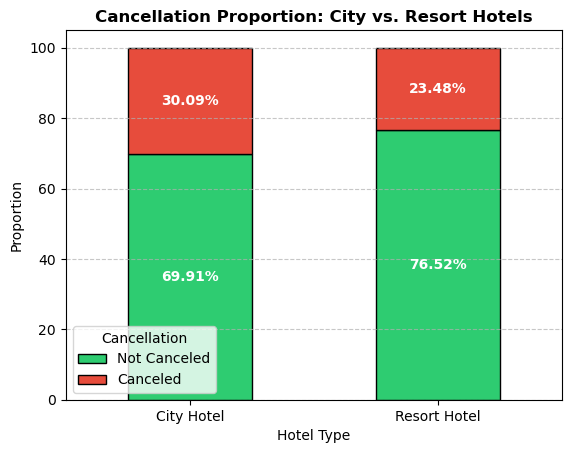

In [80]:
plt.figure(figsize=(15, 10))
cancellation_data = pd.crosstab(df['hotel'], df['is_canceled'], normalize=0)*100

ax = cancellation_data.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], edgecolor='black')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%', label_type='center', color='white', weight='semibold')

plt.legend(title='Cancellation', labels=['Not Canceled', 'Canceled'])
plt.title('Cancellation Proportion: City vs. Resort Hotels', fontweight='bold')
plt.xlabel('Hotel Type')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.yticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Based on the graph above, City Hotel have slightly higher cancellation rate at about **30%** compared to about **24%** for Resort Hotel.

### Which customer segment have the highest cancellation rate?


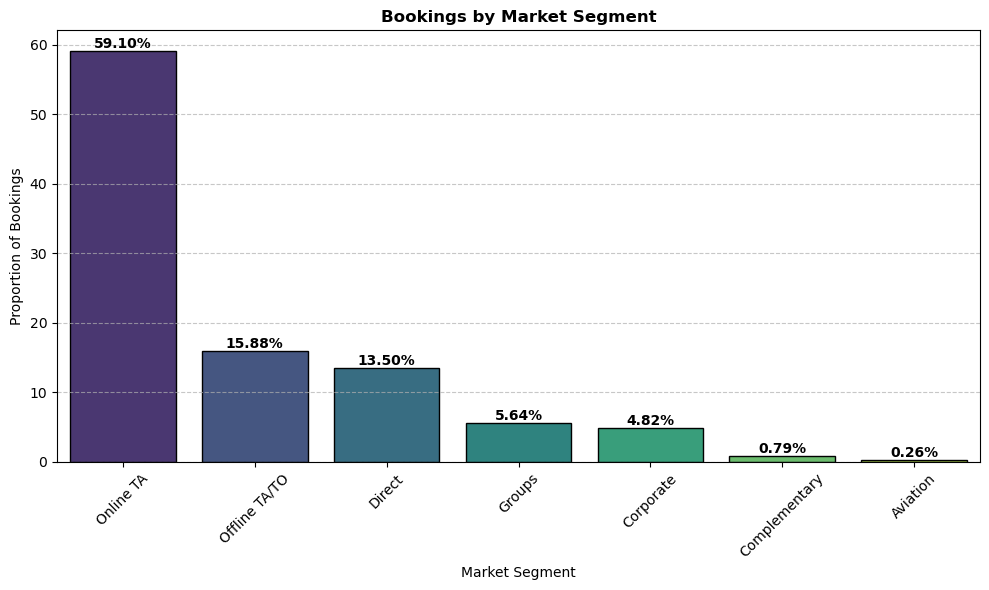

In [81]:
market_count = df['market_segment'].value_counts(normalize=True).reset_index()
market_count.columns = ['Market Segment', 'Proportion']
market_count['Proportion'] = market_count['Proportion'].apply(lambda x: round(x*100, 2))

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=market_count, x='Market Segment', y='Proportion',hue='Market Segment', palette='viridis', edgecolor='black')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%', label_type='edge', weight='semibold')

plt.title('Bookings by Market Segment', fontweight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Proportion of Bookings')
plt.xticks(rotation=45)
plt.yticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


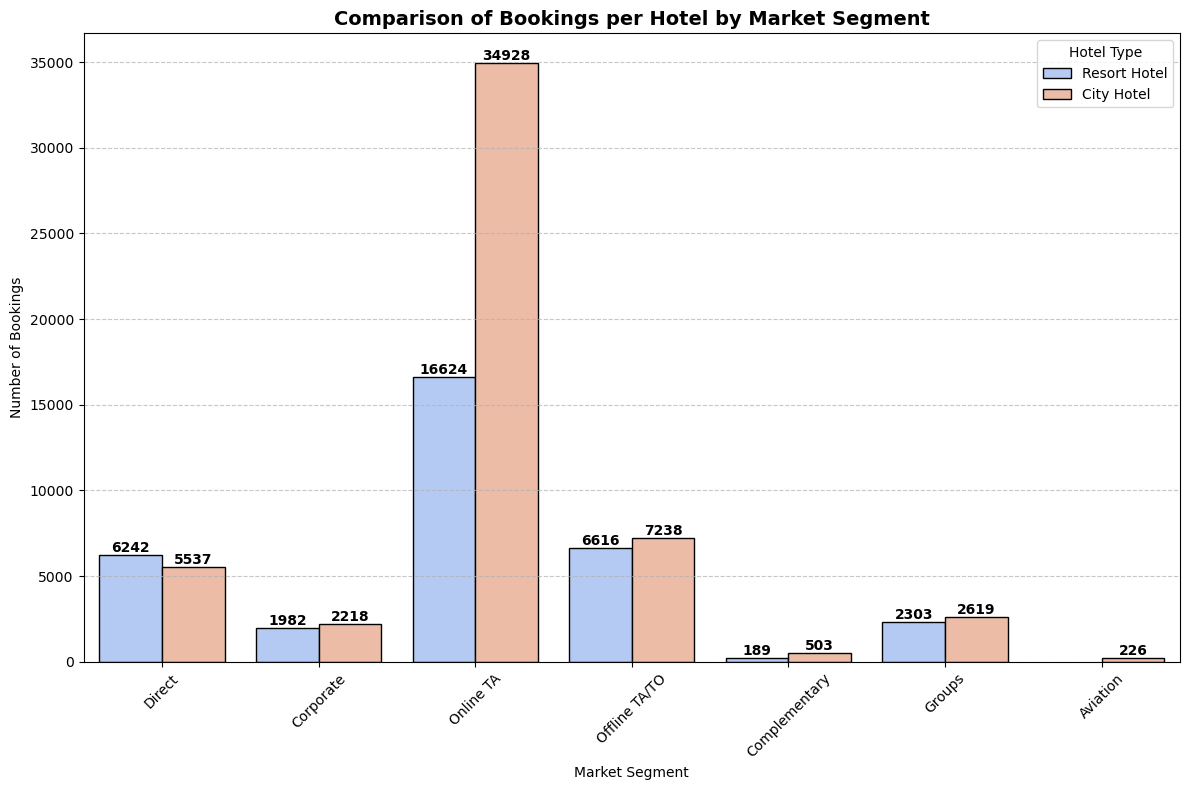

In [82]:
market_hotel = df.groupby(['market_segment', 'hotel'])['hotel'].count().reset_index(name='count')

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='market_segment', hue='hotel', palette='coolwarm', edgecolor='black')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', weight='semibold')

plt.title('Comparison of Bookings per Hotel by Market Segment', fontsize=14, fontweight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.yticks()
plt.legend(title='Hotel Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

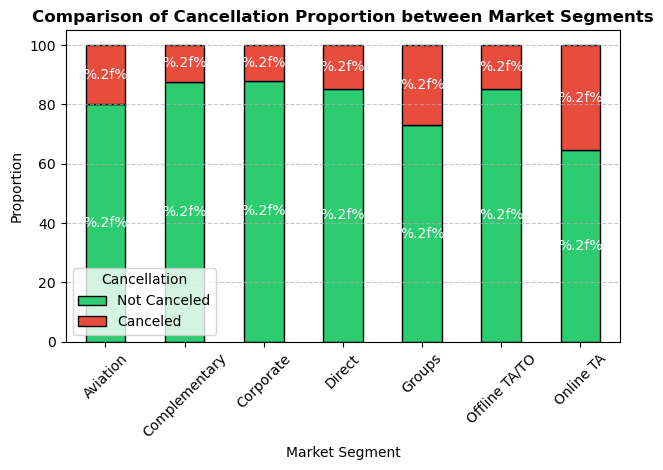

In [83]:
plt.figure(figsize=(15,8))
cancellation_data = pd.crosstab(df['market_segment'], df['is_canceled'], normalize=0)*100

ax = cancellation_data.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], edgecolor='black')

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%", label_type='center', color='white',fontweight='medium')

plt.legend(title='Cancellation', labels=['Not Canceled', 'Canceled'])
plt.title('Comparison of Cancellation Proportion between Market Segments', fontweight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.yticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Deposit type

In [84]:
deposit_data = pd.crosstab(df['deposit_type'], df['is_canceled'])
deposit_data

is_canceled,0,1
deposit_type,,
No Deposit,63085,22996
Non Refund,55,982
Refundable,81,26


In [97]:
deposit_data = pd.crosstab(df['deposit_type'], df['is_canceled'])
deposit_data_percentage = deposit_data.div(deposit_data.sum(axis=1), axis=0) * 100
deposit_data_percentage

is_canceled,0,1
deposit_type,,
No Deposit,73.285626,26.714374
Non Refund,5.303761,94.696239
Refundable,75.700935,24.299065


lihat proporsi dari masing - masing proporsi pesanan dan number of depositnya

In [86]:
df = df.drop(columns=["reservation_status", "reservation_status_date"])

buat pengertian dari reservation status

In [87]:
pd.DataFrame({
    'column': df.columns.values,
    'datatype': df.dtypes.values,
    'nullvalue(%)': df.isna().mean().values * 100,
    'negativevalue(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'uniquevalue': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,column,datatype,nullvalue(%),negativevalue(%),0value(%),duplicate,uniquevalue,sample_unique
0,hotel,object,0.0,0.000,0.000,258,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0.0,0.000,72.480,258,2,"[0, 1]"
2,lead_time,int64,0.0,0.000,6.771,258,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68..."
3,arrival_date_month,category,0.0,0.000,0.000,258,12,"['July', 'August', 'September', 'October', 'No..."
4,arrival_date_week_number,int64,0.0,0.000,0.000,258,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
5,arrival_date_day_of_month,int64,0.0,0.000,0.000,258,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
6,stays_in_weekend_nights,int64,0.0,0.000,40.189,258,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,..."
7,stays_in_week_nights,int64,0.0,0.000,7.006,258,33,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,..."
8,adults,int64,0.0,0.000,0.251,258,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 20, 6, 5, 10, 0]"
9,children,int64,0.0,0.000,90.411,258,5,"[0, 1, 2, 10, 3]"


#### NEWWW

In [88]:
from sklearn.metrics import make_scorer, recall_score, f1_score

In [ ]:
####

In [ ]:
X = df.drop(columns=["is_canceled"])
y = df["is_canceled"]

categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

X[categorical_features] = X[categorical_features].astype(str)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)


models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(verbose=-1)
}

# Scoring metrics
scoring = {
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score)
}

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Benchmarking function
def benchmark_model(model):
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    recall_train = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="recall")
    f1_train = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="f1")
    recall_test = cross_val_score(pipeline, X_test, y_test, cv=5, scoring="recall")
    f1_test = cross_val_score(pipeline, X_test, y_test, cv=5, scoring="f1")
    
    return {
        "Recall Mean (Train)": np.mean(recall_train), "Recall Std (Train)": np.std(recall_train),
        "F1 Mean (Train)": np.mean(f1_train), "F1 Std (Train)": np.std(f1_train),
        "Recall Mean (Test)": np.mean(recall_test), "Recall Std (Test)": np.std(recall_test),
        "F1 Mean (Test)": np.mean(f1_test), "F1 Std (Test)": np.std(f1_test)
    }

# Run benchmarking
results = {name: benchmark_model(model) for name, model in models.items()}
results_df = pd.DataFrame(results).T

# Display results
print(results_df)


                     Recall Mean (Train)  Recall Std (Train)  F1 Mean (Train)  \
Logistic Regression             0.532520            0.004756         0.600586   
KNN                             0.594646            0.006629         0.610560   
Decision Tree                   0.636515            0.003511         0.632670   
Random Forest                   0.610946            0.008342         0.683084   
XGBoost                         0.666563            0.006969         0.706293   
LightGBM                        0.657606            0.006766         0.700707   

                     F1 Std (Train)  Recall Mean (Test)  Recall Std (Test)  \
Logistic Regression        0.003062            0.539264           0.005355   
KNN                        0.005421            0.554886           0.010465   
Decision Tree              0.003927            0.603211           0.008471   
Random Forest              0.003773            0.529891           0.006688   
XGBoost                    0.005110       

## --------

In [91]:
from sklearn.metrics import make_scorer, recall_score, f1_score, roc_curve, auc, precision_recall_curve

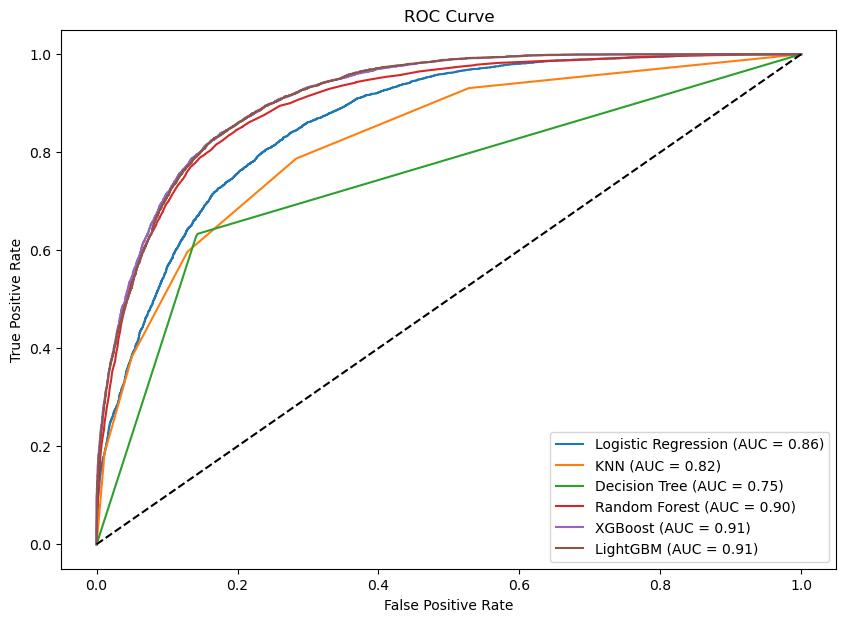

In [92]:
# Plot ROC AUC for each model
def plot_roc_auc(models, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(10, 7))
    for name, model in models.items():
        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("classifier", model)
        ])
        pipeline.fit(X_train, y_train)
        y_proba = pipeline.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

plot_roc_auc(models, X_train, X_test, y_train, y_test)

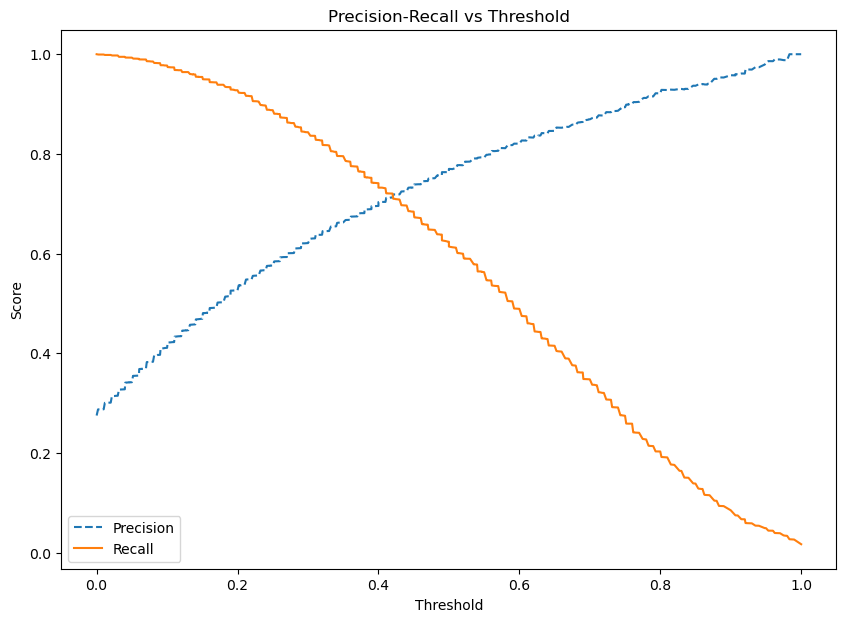

In [93]:

def threshold_analysis(model, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    pipeline.fit(X_train, y_train)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    
    plt.figure(figsize=(10, 7))
    plt.plot(thresholds, precision[:-1], label="Precision", linestyle="--")
    plt.plot(thresholds, recall[:-1], label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Precision-Recall vs Threshold")
    plt.legend()
    plt.show()

# threshold analysis
threshold_analysis(models["Random Forest"], X_train, X_test, y_train, y_test)

kalau pake F1 bisa pake PR curve tapi kalau pake F2 harus condong ke recall ke yang pakai garis . semakin tinggi trehhol semakin tinggi false negative.
semakin rendah treshol semaksin rendah false negative. coba lihat cost benefit di module 3-  pake asumsi2 kerugian dari cancle berapa kerugian dari promosi berapa. tapi ga harus bisa pake grafik penentuanya. hasilnya tresholdnya masukin ke pipeline lalu running ulang modelnya dengan treshold ini

In [100]:


y_test_proba = RandomForestClassifier().predict_proba(X_test)[:, 1]  # Use [:, 1] to get probabilities for class 1

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', linewidth=2)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.grid(alpha=0.3)
plt.show()



NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [96]:
threshold_analysis(models["Random Forest"], X_train, X_test, y_train, y_test)

AttributeError: 'RandomForestClassifier' object has no attribute 'items'

<Figure size 1200x800 with 0 Axes>

In [95]:
threshold_analysis(models["KNN"], X_train, X_test, y_train, y_test)

AttributeError: 'KNeighborsClassifier' object has no attribute 'items'

<Figure size 1200x800 with 0 Axes>

In [ ]:
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(verbose=-1)

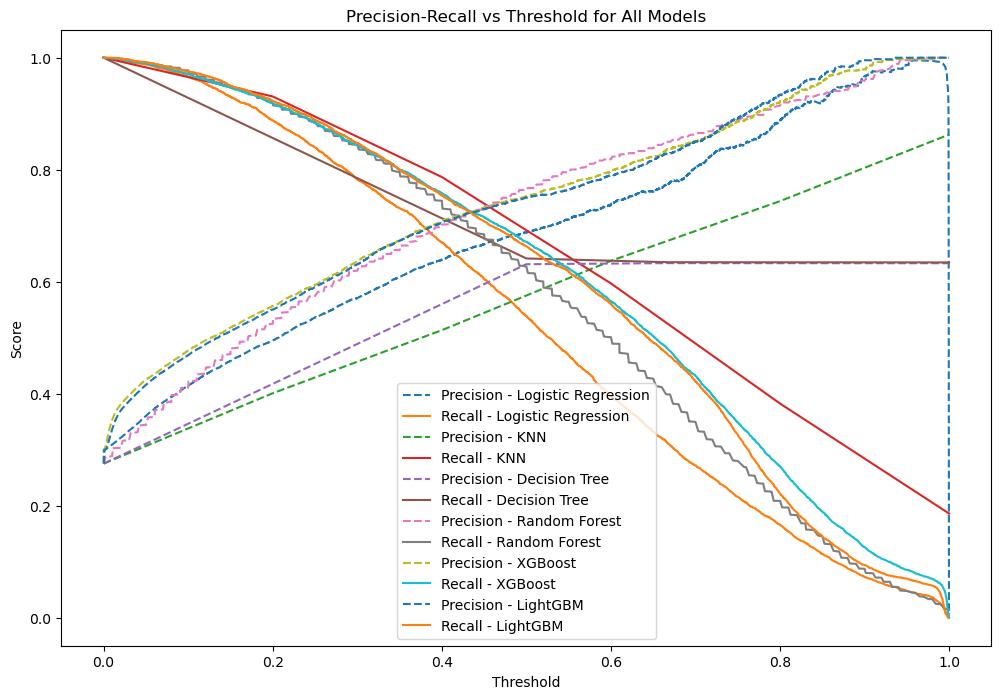

In [94]:
# Threshold analysis
def threshold_analysis(models, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(12, 8))
    for name, model in models.items():
        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("classifier", model)
        ])
        pipeline.fit(X_train, y_train)
        y_proba = pipeline.predict_proba(X_test)[:, 1]
        precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
        plt.plot(thresholds, precision[:-1], linestyle="--", label=f"Precision - {name}")
        plt.plot(thresholds, recall[:-1], label=f"Recall - {name}")
    
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Precision-Recall vs Threshold for All Models")
    plt.legend()
    plt.show()

# Perform threshold analysis for all models
threshold_analysis(models, X_train, X_test, y_train, y_test)

## Machine Learning Modelling

### Encoding

In [ ]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'),['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                    'deposit_type', 'customer_type', 'reservation_status'])
], remainder='passthrough')

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
numerical_cols = ['lead_time', 'adr']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
categorical_features = [
    'meal', 'country', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type', 'deposit_type',
    'customer_type', 'reservation_status'
]

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_features)
    ])

### Data Splitting

In [ ]:
x = df.drop(columns=['is_canceled'])
y = df['is_canceled']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

### Model Benchmark

Modeling a machine learning model

In [ ]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgboost = XGBClassifier()
lgbm = lgb.LGBMClassifier(verbose=-1)

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('logreg_vote', logreg),
        ('rf_vote', rf),
        ('lgbm_vote', lgbm)
    ],
    voting='soft'
)


# Combine into a stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('logreg_stack', logreg),
        ('rf_stack', rf),
        ('lgbm_stack', lgbm)
    ],
    final_estimator=LogisticRegression(solver='liblinear', random_state=42),
    cv=5
)

In [ ]:

list_algo = [logreg, knn, dt, rf, xgboost, lgbm, voting_clf, stacking_clf]

scoring_metrics = ['recall', 'precision', 'f1', 'accuracy']


fold_results = {}


for num_folds in [10]:
    results = []
    print(f"Evaluating with {num_folds} folds:")

    for algo in list_algo:
        # Pipeline
        pipe_model = Pipeline([
            ('preprocessing', transformer),
            ('modeling', algo)
        ])

        # Cross-validation
        cv_results = cross_validate(
            estimator=pipe_model,
            X=x_train,
            y=y_train,
            cv=num_folds,
            scoring=scoring_metrics,
            return_train_score=False
        )

        # Store results
        algo_results = {
            'model': algo.__class__.__name__,
            'recall_mean': cv_results['test_recall'].mean(),
            'precision_mean': cv_results['test_precision'].mean(),
            'f1_mean': cv_results['test_f1'].mean(),
            'accuracy_mean': cv_results['test_accuracy'].mean(),
            'recall_std': cv_results['test_recall'].std(),
            'precision_std': cv_results['test_precision'].std(),
            'f1_std': cv_results['test_f1'].std(),
            'accuracy_std': cv_results['test_accuracy'].std(),
        }
        results.append(algo_results)

    # Store results for this fold
    fold_results[num_folds] = results

# Print results
for num_folds, results in fold_results.items():
    print(f"\nResults for {num_folds} folds:")
    for result in results:
        print(result)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17282, number of negative: 45520
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275182 -> initscore=-0.968486
[LightGBM] [Info] Start training from score -0.968486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17282, number of negative: 45520
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275182 -> initscore=-0.968486
[LightGBM] [Info] Start training from score -0.968486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17282, number of negative: 45520
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275182 -> initscore=-0.968486
[LightGBM] [Info] Start training from score -0.968486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 111
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17282, number of negative: 45520
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275182 -> initscore=-0.968486
[LightGBM] [Info] Start training from score -0.968486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17282, number of negative: 45520
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275182 -> initscore=-0.968486
[LightGBM] [Info] Start training from score -0.968486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17282, number of negative: 45520
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275182 -> initscore=-0.968486
[LightGBM] [Info] Start training from score -0.968486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 111
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17282, number of negative: 45520
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275182 -> initscore=-0.968486
[LightGBM] [Info] Start training from score -0.968486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13825, number of negative: 36416
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 50241, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275174 -> initscore=-0.968530
[LightGBM] [Info] Start training from score -0.968530
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13826, number of negative: 36416
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 714
[LightGBM] [Info] Number of data points in the train set: 50242, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275188 -> initscore=-0.968457
[LightGBM] [Info] Start training from score -0.968457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13826, number of negative: 36416
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 50242, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275188 -> initscore=-0.968457
[LightGBM] [Info] Start training from score -0.968457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17282, number of negative: 45520
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275182 -> initscore=-0.968486
[LightGBM] [Info] Start training from score -0.968486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13825, number of negative: 36416
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 50241, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275174 -> initscore=-0.968530
[LightGBM] [Info] Start training from score -0.968530
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13826, number of negative: 36416
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 50242, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275188 -> initscore=-0.968457
[LightGBM] [Info] Start training from score -0.968457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13826, number of negative: 36416
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 50242, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275188 -> initscore=-0.968457
[LightGBM] [Info] Start training from score -0.968457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17282, number of negative: 45520
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275182 -> initscore=-0.968486
[LightGBM] [Info] Start training from score -0.968486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13825, number of negative: 36416
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 714
[LightGBM] [Info] Number of data points in the train set: 50241, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275174 -> initscore=-0.968530
[LightGBM] [Info] Start training from score -0.968530
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13826, number of negative: 36416
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 50242, number of used features: 106
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275188 -> initscore=-0.968457
[LightGBM] [Info] Start training from score -0.968457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13826, number of negative: 36416
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 50242, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275188 -> initscore=-0.968457
[LightGBM] [Info] Start training from score -0.968457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13826, number of negative: 36415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 714
[LightGBM] [Info] Number of data points in the train set: 50241, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275194 -> initscore=-0.968430
[LightGBM] [Info] Start training from score -0.968430
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13826, number of negative: 36416
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 714
[LightGBM] [Info] Number of data points in the train set: 50242, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275188 -> initscore=-0.968457
[LightGBM] [Info] Start training from score -0.968457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13827, number of negative: 36415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 50242, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275208 -> initscore=-0.968358
[LightGBM] [Info] Start training from score -0.968358
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13826, number of negative: 36415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 50241, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275194 -> initscore=-0.968430
[LightGBM] [Info] Start training from score -0.968430
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13826, number of negative: 36416
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 714
[LightGBM] [Info] Number of data points in the train set: 50242, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275188 -> initscore=-0.968457
[LightGBM] [Info] Start training from score -0.968457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13827, number of negative: 36415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 50242, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275208 -> initscore=-0.968358
[LightGBM] [Info] Start training from score -0.968358
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13826, number of negative: 36415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 714
[LightGBM] [Info] Number of data points in the train set: 50241, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275194 -> initscore=-0.968430
[LightGBM] [Info] Start training from score -0.968430
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13826, number of negative: 36416
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 714
[LightGBM] [Info] Number of data points in the train set: 50242, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275188 -> initscore=-0.968457
[LightGBM] [Info] Start training from score -0.968457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13827, number of negative: 36415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 50242, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275208 -> initscore=-0.968358
[LightGBM] [Info] Start training from score -0.968358
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 111
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13826, number of negative: 36415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 50241, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275194 -> initscore=-0.968430
[LightGBM] [Info] Start training from score -0.968430
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13826, number of negative: 36416
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 714
[LightGBM] [Info] Number of data points in the train set: 50242, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275188 -> initscore=-0.968457
[LightGBM] [Info] Start training from score -0.968457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13827, number of negative: 36415
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 50242, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275208 -> initscore=-0.968358
[LightGBM] [Info] Start training from score -0.968358
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17283, number of negative: 45519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 62802, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275198 -> initscore=-0.968406
[LightGBM] [Info] Start training from score -0.968406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13826, number of negative: 36415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 50241, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275194 -> initscore=-0.968430
[LightGBM] [Info] Start training from score -0.968430
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

Coba binary encoder

In [ ]:
num_cols = list(x.select_dtypes(include=('int', 'float')).columns)
num_cols

['lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
cat_cols = list(df.select_dtypes(include=('object')).columns)

In [ ]:
cat_one_hot = [col for col in cat_cols if df[col].nunique() <= 5]
cat_binary = [col for col in cat_cols if df[col].nunique() > 5]

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary', ce.BinaryEncoder())
])

transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('onehot', onehot_transformer, cat_one_hot),
        ('binary', binary_transformer, cat_binary)
    ])

In [ ]:
list_algo = [logreg, knn, dt, rf, xgboost, lgbm, voting_clf, stacking_clf]
scoring_metrics = ['recall', 'precision', 'f1', 'accuracy']

model_names = []
f1_mean = []
f1_std = []
recall_mean = []
recall_std = []

for algo in list_algo:

    pipe_model = Pipeline([
        ('transformer', transformer),
        ('model', algo)
    ])

    skfold=StratifiedKFold(n_splits=5)
    model_cv = cross_validate(
        estimator = pipe_model,
        X= x_train,
        y= y_train,
        cv=skfold,
        scoring= scoring_metrics,
        error_score='raise'
        )

    model_names.append(algo.__class__.__name__)
    f1_mean.append(model_cv['test_f1'].mean())
    f1_std.append(model_cv['test_f1'].std())
    recall_mean.append(model_cv['test_recall'].mean())
    recall_std.append(model_cv['test_recall'].std())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [ ]:
models_cv = pd.DataFrame({
    'Model':model_names,
    'Recall Mean':recall_mean,
    'Recall Std':recall_std,
    'F1 Mean':f1_mean,
    'F1 Std':f1_std
})

models_cv

,Model,Recall Mean,Recall Std,F1 Mean,F1 Std
0,LogisticRegression,1.000000,0.000000,1.00000,0.000000
1,KNeighborsClassifier,0.901265,0.002316,0.93955,0.001621
2,DecisionTreeClassifier,1.000000,0.000000,1.00000,0.000000
3,RandomForestClassifier,1.000000,0.000000,1.00000,0.000000
4,XGBClassifier,1.000000,0.000000,1.00000,0.000000
5,LGBMClassifier,1.000000,0.000000,1.00000,0.000000
6,VotingClassifier,1.000000,0.000000,1.00000,0.000000
7,StackingClassifier,1.000000,0.000000,1.00000,0.000000


## Conclusion and Recommendation